## Importing Libraries

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
df = pd.read_csv('datasets/personality_synthetic_dataset.csv')
df.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

In [3]:
# Describing Dataset
df.describe()

,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5.509190,5.454690,5.525955,5.958689,6.014381,5.040063,6.964450,6.483220,5.996018,5.973280,...,5.495280,5.033716,5.940795,5.492490,6.498574,5.508935,6.006893,6.501986,5.516168,5.981982
std,2.468526,2.493731,2.488006,2.162427,2.178551,2.810563,1.647944,1.534911,1.496690,1.697589,...,1.922809,2.203344,2.170924,1.931728,1.889493,1.932081,1.683523,1.889782,1.944257,1.490327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.308044,0.804853,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.590989,3.509578,3.595866,4.382619,4.415537,2.727584,5.812701,5.448486,4.992667,4.805742,...,4.156240,3.429189,4.325104,4.127064,5.157772,4.155375,4.867919,5.160594,4.149764,4.973047
50%,5.540706,5.464038,5.574786,5.972345,6.051489,5.053005,6.989855,6.481365,6.003320,5.986871,...,5.499699,5.045021,5.962857,5.508153,6.528960,5.498701,6.006740,6.525735,5.528102,5.978661
75%,7.424123,7.416314,7.472371,7.598495,7.668598,7.363676,8.155574,7.521483,7.013412,7.142282,...,6.853083,6.656162,7.564929,6.861487,7.885414,6.877156,7.160525,7.878841,6.905844,6.991311
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


C:\Users\King Francis\AppData\Local\Temp\ipykernel_7536\799408035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='personality_type', data=df, palette='pastel')


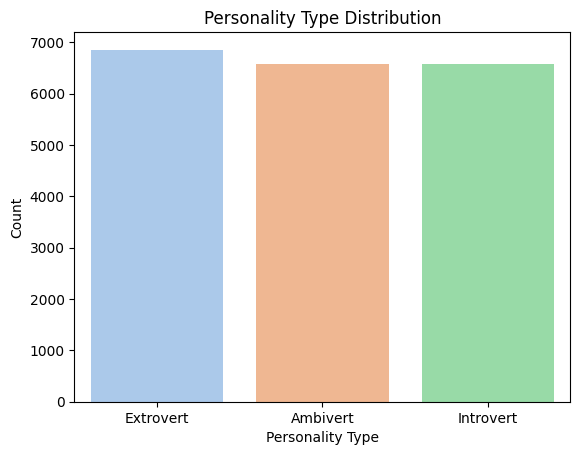

In [4]:
# Visualizing the dataset

sns.countplot(x='personality_type', data=df, palette='pastel')
plt.title("Personality Type Distribution")
plt.xlabel("Personality Type")
plt.ylabel("Count")
plt.show()

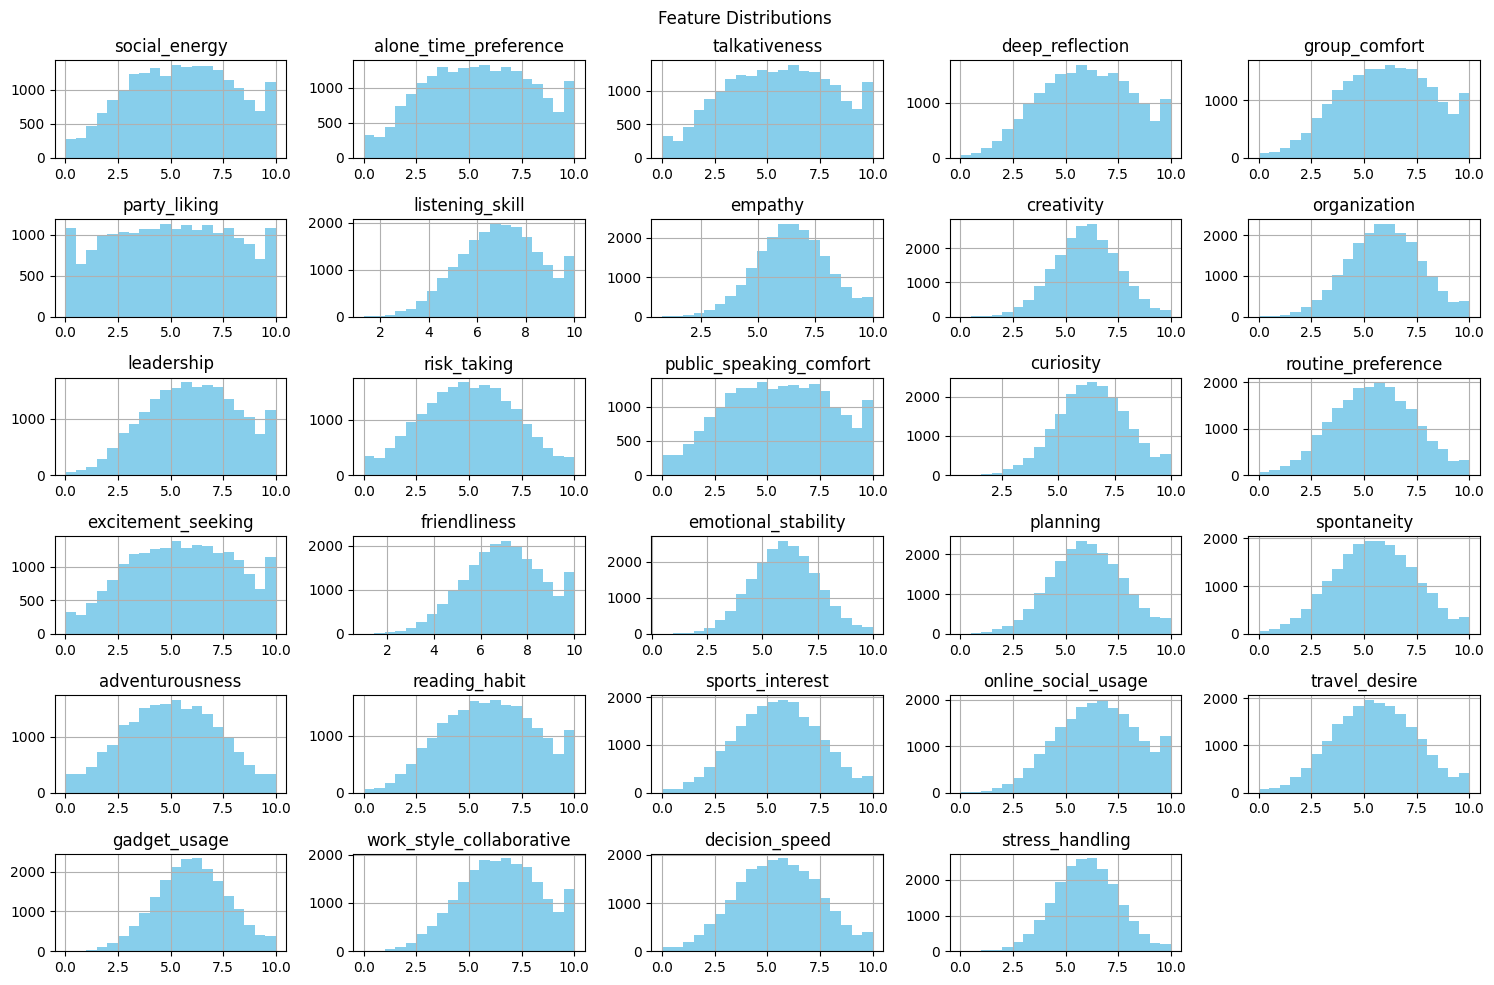

In [5]:
df.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

In [6]:

df.dropna()

scaler = StandardScaler()
X = df.drop('personality_type', axis=1)
X_scaled = scaler.fit_transform(X)
y = df['personality_type']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

df.head()


,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084


## Training the models

Gaussian Model

In [7]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


Metrics for model Gaussian

In [8]:
#metrics
gaussian_preds = gaussian.predict(X_test)

acc = accuracy_score(y_test, gaussian_preds)
cm = confusion_matrix(y_test, gaussian_preds)
cr = classification_report(y_test, gaussian_preds)

print("Accuracy: ", acc * 100)
print("\nConfusion Matrix: \n", cm)
print("\nClassification Report: \n", cr)

Accuracy:  99.7

Confusion Matrix: 
 [[1254    4    3]
 [   4 1422    0]
 [   1    0 1312]]

Classification Report: 
               precision    recall  f1-score   support

    Ambivert       1.00      0.99      1.00      1261
   Extrovert       1.00      1.00      1.00      1426
   Introvert       1.00      1.00      1.00      1313

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



Logistic Regression Model

In [9]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

cv_scores = cross_val_score(logreg, X_scaled, y, cv=5)

# Fit the final model
logreg.fit(X_train, y_train)

c:\Users\King Francis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\King Francis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\King Francis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\King Francis\App

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


Metrics for model Logistics Regression

In [10]:
#metrics
logreg_preds = logreg.predict(X_test)

acc = accuracy_score(y_test, logreg_preds)
cm = confusion_matrix(y_test, logreg_preds)
cr = classification_report(y_test, logreg_preds)

print("Accuracy: ", acc * 100)
print("\nConfusion Matrix: \n", cm)
print("\nClassification Report: \n", cr)

Accuracy:  99.775

Confusion Matrix: 
 [[1258    1    2]
 [   5 1421    0]
 [   1    0 1312]]

Classification Report: 
               precision    recall  f1-score   support

    Ambivert       1.00      1.00      1.00      1261
   Extrovert       1.00      1.00      1.00      1426
   Introvert       1.00      1.00      1.00      1313

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



## Performance comparison of the models

Gaussian Naive Bayes Accuracy: 99.7 %
Logistics Regression Accuracy: 99.78 %

Gaussian Naive Bayes Report:
               precision    recall  f1-score   support

    Ambivert       1.00      0.99      1.00      1261
   Extrovert       1.00      1.00      1.00      1426
   Introvert       1.00      1.00      1.00      1313

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Logistics Regression Report:
               precision    recall  f1-score   support

    Ambivert       1.00      1.00      1.00      1261
   Extrovert       1.00      1.00      1.00      1426
   Introvert       1.00      1.00      1.00      1313

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



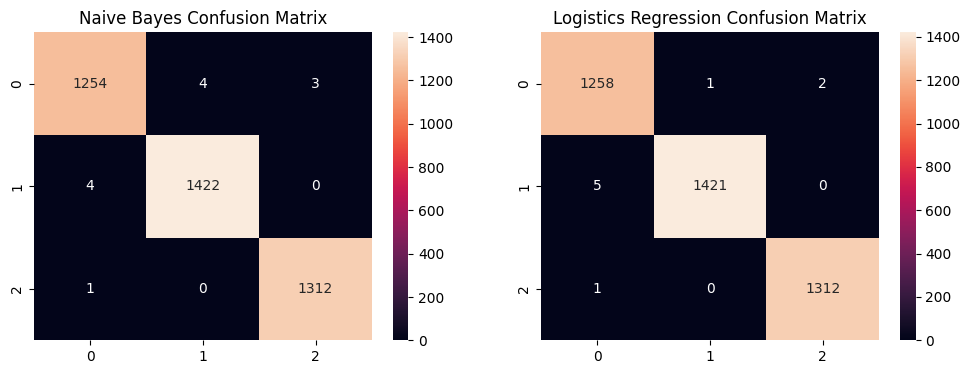

In [11]:
# Evaluate
print("Gaussian Naive Bayes Accuracy:", round(accuracy_score(y_test, gaussian_preds)*100, 2), "%")
print("Logistics Regression Accuracy:", round(accuracy_score(y_test, logreg_preds)*100, 2), "%")

# Classification report
print("\nGaussian Naive Bayes Report:\n", classification_report(y_test, gaussian_preds))
print("\nLogistics Regression Report:\n", classification_report(y_test, logreg_preds))

# Confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_test, gaussian_preds), annot=True, fmt="d", ax=axs[0])
axs[0].set_title("Naive Bayes Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, logreg_preds), annot=True, fmt="d", ax=axs[1])
axs[1].set_title("Logistics Regression Confusion Matrix")
plt.show()

## We selected the Logistic Regression model for our personality-type classification system based on a combination of performance, interpretability, and practicality:

Reasoning:

Balanced Accuracy Across All Classes:
Logistic Regression demonstrated consistent and reliable accuracy across all personality types, including the often-challenging "Ambivert" class. Unlike Naive Bayes, which struggled with class overlap, Logistic Regression provided a balanced performance.

Interpretability:
Logistic Regression provides interpretable coefficients, helping us understand how specific personality traits influence the classification. This interpretability is critical in psychological or behavioral applications where understanding feature influence is as important as the prediction itself.

Efficient and Scalable Inference:
Logistic Regression is lightweight and very efficient during inference, making it ideal for deployment in real-time web apps like our Streamlit-based predictor.

Robustness With Well-Scaled Data:
After applying StandardScaler, the features became more comparable. Logistic Regression benefits from this transformation and converged smoothly during training, providing a stable and well-generalized model.

Suitability for Multiclass Classification:
Using the multinomial option with the lbfgs solver, Logistic Regression handled our three-class problem (Introvert, Ambivert, Extrovert) efficiently without the oversimplifying assumptions that Naive Bayes makes (i.e., feature independence).



Logistic Regression strikes the right balance between predictive power, explainability, and computational efficiency, making it the most suitable choice for our application.